In [ ]:
#load basiclibraries
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype #For definition of custom categorical data types (ordinal if necesary)
import matplotlib.pyplot as plt
import seaborn as sns  # For hi level, Pandas oriented, graphics
import scipy.stats as stats  # For statistical inference   

In [ ]:
drive.mount('mydrive')      #Bridge to Google Drive

Drive already mounted at mydrive; to attempt to forcibly remount, call drive.mount("mydrive", force_remount=True).


In [ ]:
heart = pd.read_csv ('/content/mydrive/MyDrive/EDEM/heart.csv', sep=',')

ChestPainType
ASY    54.959677
ATA    49.242775
NAP    53.310345
TA     54.826087
Name: Age, dtype: float64
F_onewayResult(statistic=16.86834805144362, pvalue=1.136820472395362e-10)


Text(0.5, 1.0, 'Figure 2. Average Age by ChestPainType.\n')

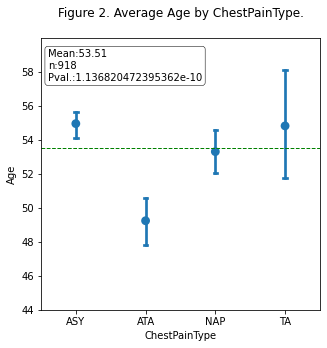

In [ ]:
#ESCOGEMOS LA TIPO DE DOLOR EN EL PECHO Y EL EDAD COMO SUJETO DE ESTUDIO
#Descriptive comparison:
print(heart.groupby('ChestPainType').Age.mean())

#Statistical comparison:
#Extract the two sub samples and store them in two objects
Age_ASY=heart.loc[heart.ChestPainType=='ASY', "Age"]
Age_ATA=heart.loc[heart.ChestPainType=='ATA', "Age"]
Age_NAP=heart.loc[heart.ChestPainType=='NAP', "Age"] 
Age_TA=heart.loc[heart.ChestPainType=='TA', "Age"] 

res = stats.f_oneway(Age_ASY,Age_ATA,Age_NAP,Age_TA)
print(res)

#CI meanplot
#Graphic comparison: confidence intervals for the means
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="ChestPainType", y="Age", data=heart,capsize=0.05, ci=95, join=0, order=['ASY', 'ATA','NAP','TA'])
ax.set_ylabel('Age')
plt.yticks(np.arange(44, 60, step=2))
plt.ylim(44,60)
plt.axhline(y=heart.Age.mean(),linewidth=1,linestyle= 'dashed',color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
# plt.text(1.5, 5000, 'Mean: 4504.3''\n''n: 731' '\n' 'F: 40.06''\n' 'Pval.: 0.000', bbox=props)
plt.text(-0.4,57.5,'Mean:53.51''\n''n:918''\n' 'Pval.:1.136820472395362e-10', bbox=props)
plt.xlabel('ChestPainType')
plt.title('Figure 2. Average Age by ChestPainType.''\n')

#OBSERVAMOS QUE EL PVALUE ES MUY CERCANO AL 0 Y POR TANTO RECHAZAMOS LA HIPOSESIS NULA
#PODEMOS DECIR PUES QUE EL TIPO DE DOLOR EN EL PECHO NO DIFIERE CON LA VARIABLE EDAD

In [ ]:
#SEX
mytablesex = heart.groupby(['Sex']).size()
print(mytablesex)
n = mytablesex.sum()


Sex
F    193
M    725
dtype: int64


Sex
F    193
M    725
dtype: int64
Sex
F    21.023965
M    78.976035
dtype: float64


<BarContainer object of 2 artists>

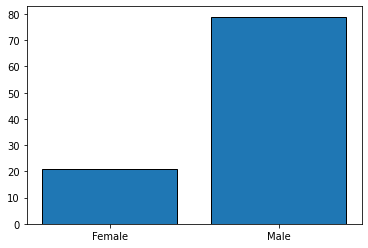

In [ ]:
#SEX
mytablesex = heart.groupby(['Sex']).size()
print(mytablesex)
n=mytablesex.sum()
mytablesex2 = (mytablesex/n)*100
print(mytablesex2)
n=mytablesex.sum()
bar_list = ['Female', 'Male']
plt.bar(bar_list, mytablesex2, edgecolor='black')

In [ ]:
#Recoding DV for analysis
res = heart.Sex.describe()
m = res[1]
sd = res[2]
n = res[0]

In [ ]:
heart.shape
heart.head()
#QC OK

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Recoding DV for analysis
res = heart.Age.describe()
print (res)
# Store parameters as numbers
m  = res[1]
sd = res[2]
n  = res[0]

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


In [ ]:
### Recode Age to string
heart.loc[  (heart['Age']<(m-sd)) ,"Age_str"]= "Young people"
heart.loc[ ((heart['Age']>(m-sd)) & (heart['Age']<(m+sd))) ,"Age_str"]= "Average Age"
heart.loc[  (heart['Age']>(m+sd)) ,"Age_str"]= "Old people"

In [ ]:
### Recode Age to ordinal
my_categories=["Young people", "Average Age", "Old people"]
my_Age_type = CategoricalDtype(categories=my_categories, ordered=True)
heart["Age_cat"] = heart.Age_str.astype(my_Age_type)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               918 non-null    int64   
 1   Sex               918 non-null    object  
 2   ChestPainType     918 non-null    object  
 3   RestingBP         918 non-null    int64   
 4   Cholesterol       918 non-null    int64   
 5   FastingBS         918 non-null    int64   
 6   RestingECG        918 non-null    object  
 7   MaxHR             918 non-null    int64   
 8   ExerciseAngina    918 non-null    object  
 9   Oldpeak           918 non-null    float64 
 10  ST_Slope          918 non-null    object  
 11  HeartDisease      918 non-null    int64   
 12  Age_str           918 non-null    object  
 13  Age_cat           333 non-null    category
 14  Age_st            918 non-null    int64   
 15  Sex_st            918 non-null    int64   
 16  HeartDiseas_st    918 non-

col_0               Age
Age_cat                
Young people  53.453453
Old people    46.546547
col_0          Age
Age_cat           
Young people  53.5
Old people    46.5


<BarContainer object of 2 artists>

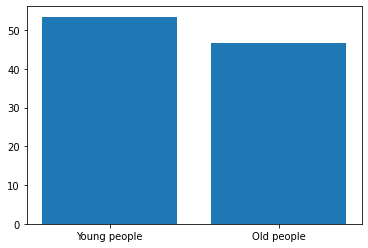

In [ ]:
#frequencies & barchart
mytable = pd.crosstab(heart.Age_cat, columns="Age", normalize='columns')*100
print(mytable)
print (round(mytable,1))
plt.bar(mytable.index, mytable['Age'])

In [ ]:
############## Recode  Heart Disease
#To string
heart["HeartDiseas_st"] = heart.HeartDisease
heart.HeartDisease_st = heart.HeartDisease_st.replace(to_replace=0, value="No")
heart.HeartDisease_st = heart.HeartDisease_st.replace(to_replace=1, value="Yes")

In [ ]:
#To category
my_categories=["No","Yes"]
my_datatype = CategoricalDtype(categories=my_categories, ordered=True)
heart["HeartDisease_cat"] = heart.HeartDisease_st.astype(my_datatype)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               918 non-null    int64   
 1   Sex               918 non-null    object  
 2   ChestPainType     918 non-null    object  
 3   RestingBP         918 non-null    int64   
 4   Cholesterol       918 non-null    int64   
 5   FastingBS         918 non-null    int64   
 6   RestingECG        918 non-null    object  
 7   MaxHR             918 non-null    int64   
 8   ExerciseAngina    918 non-null    object  
 9   Oldpeak           918 non-null    float64 
 10  ST_Slope          918 non-null    object  
 11  HeartDisease      918 non-null    int64   
 12  Age_str           918 non-null    object  
 13  Age_cat           333 non-null    category
 14  Age_st            918 non-null    object  
 15  Sex_st            918 non-null    int64   
 16  HeartDiseas_st    918 non-

col_0                 count
HeartDisease_cat           
No                44.662309
Yes               55.337691


Text(0.5, 1.0, 'Figure 5. Percentage of Heart Disease')

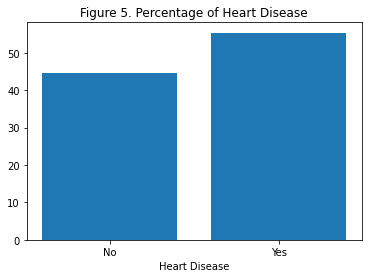

In [ ]:
# Barchart for Working day
mytable = pd.crosstab(index=heart["HeartDisease_cat"], columns="count") # Crosstab
n=mytable.sum()
mytable2 = (mytable/n)*100
print(mytable2)
plt.bar(mytable2.index, mytable2['count'])
plt.xlabel('Heart Disease')
plt.title('Figure 5. Percentage of Heart Disease')